# Librerías y lectura

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import os

In [150]:
df = pd.read_csv('./Dataset_TP/train/_annotations.csv')

# Datos generales

In [151]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Foto-Placa-463-_jpg.rf.3bcf1a5eee313dec384ed6e...,640,640,placa,224,386,257,399
1,Foto-Placa-463-_jpg.rf.3bcf1a5eee313dec384ed6e...,640,640,placa,269,99,285,107
2,Foto-Placa-463-_jpg.rf.3bcf1a5eee313dec384ed6e...,640,640,placa,521,193,540,202
3,2023-05-09-07-26-37-29956-1425520mp4_1425522_j...,640,640,placa,322,164,389,219
4,27-de-abril-9_jpg.rf.8775093de7a3c51d555e0ec69...,640,640,placa,341,424,370,457


In [152]:
# Tamaño del DataFrame
tamaño = df.size

# Datos únicos en la columna filename
unicos = df["filename"].nunique()

# Conteo de ocurrencias de cada archivo
conteo = df["filename"].value_counts().reset_index()["count"].value_counts()

In [153]:
print(f"Tamaño del DataFrame: {tamaño}")
print(f"Número de archivos únicos: {unicos}")
print("Conteo de ocurrencias de cada archivo:")
print(conteo)

Tamaño del DataFrame: 33152
Número de archivos únicos: 2433
Conteo de ocurrencias de cada archivo:
count
1    1381
2     612
3     296
4      84
5      51
6       6
8       3
Name: count, dtype: int64


# EDA

## Análisis general

### Cantidad de placas por imagen (frecuencia)

Text(0, 0.5, 'Número de imágenes')

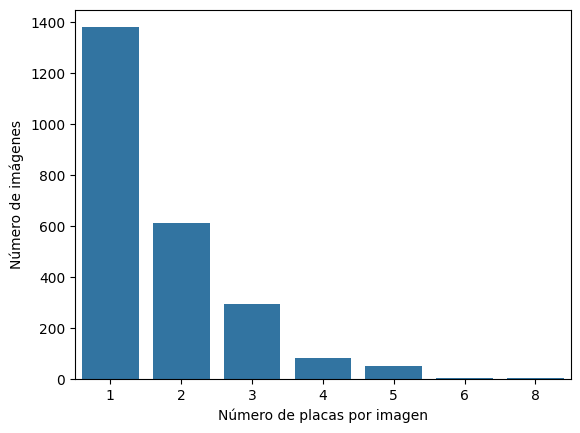

In [154]:
sns.barplot(df["filename"].value_counts().reset_index()["count"].value_counts())
plt.xlabel("Número de placas por imagen")
plt.ylabel("Número de imágenes")

### Dimensiones de la Región de Placa (Bounding Box)

#### Ancho de las placas

Text(0.5, 1.0, 'Boxplot del Ancho de las Placas')

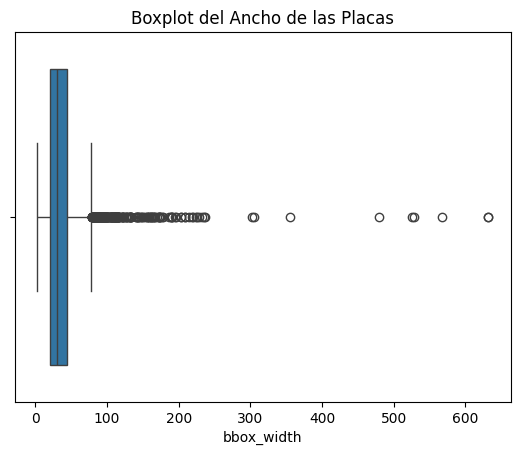

In [167]:
#Ancho de bbox: Distribución, media, mediana, rango
df['bbox_width'] = df['xmax'] - df['xmin']

sns.boxplot(x=df["bbox_width"])
plt.title('Boxplot del Ancho de las Placas')

In [168]:
df['bbox_width'].describe().reset_index()

,index,bbox_width
0,count,4144.000000
1,mean,38.033060
2,std,33.445026
3,min,3.000000
4,25%,21.000000
5,50%,31.000000
6,75%,44.000000
7,max,632.000000


#### Alto de las placas

Text(0.5, 1.0, 'Boxplot del Ancho de las Placas')

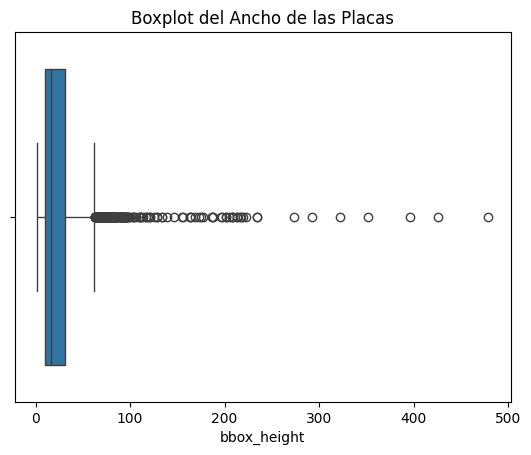

In [169]:
#Alto de bbox: Distribución, media, mediana, rango
df['bbox_height'] = df['ymax'] - df['ymin']

sns.boxplot(x=df["bbox_height"])
plt.title('Boxplot del Ancho de las Placas')

In [170]:
df['bbox_height'].describe().reset_index()

,index,bbox_height
0,count,4144.000000
1,mean,24.984556
2,std,27.928873
3,min,2.000000
4,25%,10.000000
5,50%,16.000000
6,75%,31.000000
7,max,479.000000


#### Área total de las placas

In [171]:
# Área total: Histograma de tamaños
df['bbox_area'] = df['bbox_width'] * df['bbox_height']

Text(0, 0.5, 'Frecuencia')

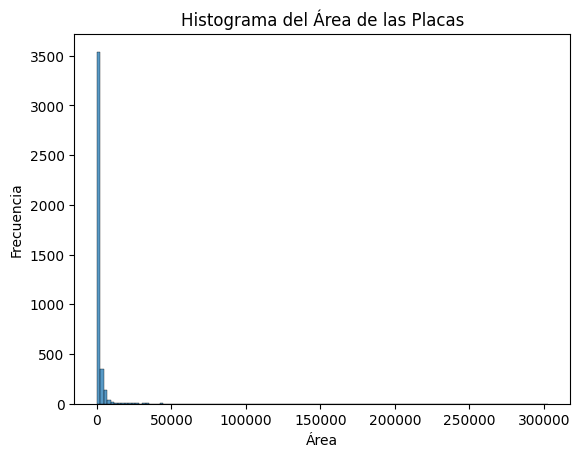

In [172]:
sns.histplot(df['bbox_area'])
plt.title('Histograma del Área de las Placas')
plt.xlabel('Área')
plt.ylabel('Frecuencia')

Para verificar los datos del histograma, hacemos un conteo para todas las áreas que cumplan con los rangos en el histograma. De este modo comprobaremos que el histograma mostrado es correcto de acuerdo a nuestros datos.

In [173]:
menos_50000 = df[df["bbox_area"] <= 50000]
print(f"Número de placas con área mayor a 50 000: {menos_50000.shape[0]}")

entre_50000_y_100000 = df[(df["bbox_area"] > 50000) & (df["bbox_area"] <= 100000)]
print(f"Número de placas con área entre 100 000 y 500 000: {entre_50000_y_100000.shape[0]}")

entre_100000_y_150000 = df[(df["bbox_area"] > 100000) & (df["bbox_area"] <= 150000)]
print(f"Número de placas con área entre 100 000 y 150 000: {entre_100000_y_150000.shape[0]}")

entre_150000_y_200000 = df[(df["bbox_area"] > 150000) & (df["bbox_area"] <= 200000)]
print(f"Número de placas con área entre 150 000 y 200,000: {entre_150000_y_200000.shape[0]}")

entre_200000_y_250000 = df[(df["bbox_area"] > 200000) & (df["bbox_area"] <= 250000)]
print(f"Número de placas con área entre 200 000 y 250 000: {entre_200000_y_250000.shape[0]}")

mas_250000 = df[df["bbox_area"] > 250000]
print(f"Número de placas con área mayor a 250 000: {mas_250000.shape[0]}")

Número de placas con área mayor a 50 000: 4133
Número de placas con área entre 100 000 y 500 000: 5
Número de placas con área entre 100 000 y 150 000: 1
Número de placas con área entre 150 000 y 200,000: 2
Número de placas con área entre 200 000 y 250 000: 1
Número de placas con área mayor a 250 000: 2


#### Relación de aspecto

Text(0.5, 1.0, 'Histograma del Aspect Ratio de las Placas')

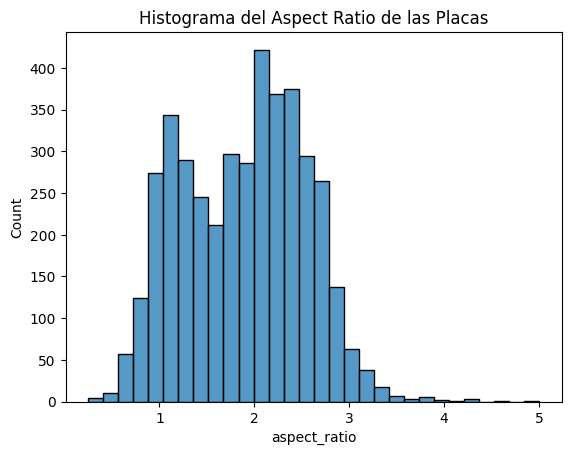

In [174]:
df["aspect_ratio"] = df['bbox_width'] / df['bbox_height']

sns.histplot(df['aspect_ratio'], bins=30)
plt.title('Histograma del Aspect Ratio de las Placas')

In [175]:
df[df["aspect_ratio"] > 4]

,filename,width,height,class,xmin,ymin,xmax,ymax,bbox_width,bbox_height,bbox_area,aspect_ratio
224,Foto-Placa-222-_jpg.rf.bf1a31d558be3546315d12b...,640,640,placa,247,627,300,640,53,13,689,4.076923
341,Foto-Placa-222-_jpg.rf.ba39f3583474912883332fc...,640,640,placa,324,32,376,44,52,12,624,4.333333
926,Foto-Placa-7-_jpg.rf.df1f390397983d7f6a0bdf487...,640,640,placa,120,610,152,617,32,7,224,4.571429
2429,Foto-Placa-248-_jpg.rf.51f2ded407a4dc2990b8585...,640,640,placa,386,0,401,3,15,3,45,5.000000
2441,Foto-Placa-260-_jpg.rf.b4a95019aa454f66be0090e...,640,640,placa,55,313,89,321,34,8,272,4.250000
2623,Foto-Placa-294-_jpg.rf.d54523456f7224b461c3c03...,640,640,placa,330,0,347,4,17,4,68,4.250000


#### Relación de variables (Regresión lineal)

Text(0.5, 1.0, 'Relación entre Ancho y Alto de las Placas')

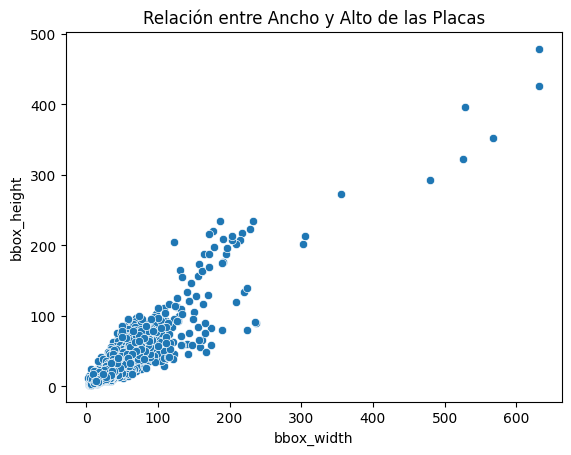

In [176]:
sns.scatterplot(data=df, x='bbox_width', y='bbox_height')
plt.title('Relación entre Ancho y Alto de las Placas')

Tamaño relativo:



In [177]:
relativo = (df["height"]*df["width"]) / df["bbox_area"]
relativo.head()

0     954.778555
1    3200.000000
2    2395.321637
3     111.153324
4     428.004180
dtype: float64

Text(0, 0.5, 'Frecuencia')

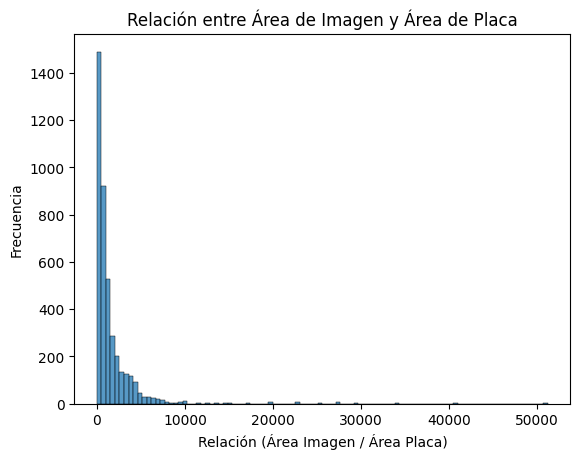

In [178]:
sns.histplot(relativo, bins=100)
plt.title('Relación entre Área de Imagen y Área de Placa')
plt.xlabel('Relación (Área Imagen / Área Placa)')
plt.ylabel('Frecuencia')

### Posición en la Imagen

Ubicación espacial:

In [179]:
dist_left = df['xmin']
dist_right = df['width'] - df['xmax']
dist_top = df['ymin']
dist_bottom = df['height'] - df['ymax']
min_dist_border = pd.concat([dist_left, dist_right, dist_top, dist_bottom], axis=1).min(axis=1)

placas_cortadas = df[min_dist_border < 5].copy()
placas_cortadas = placas_cortadas.assign(
    min_dist_border=min_dist_border[min_dist_border < 5],
    dist_left=dist_left[min_dist_border < 5],
    dist_right=dist_right[min_dist_border < 5],
    dist_top=dist_top[min_dist_border < 5],
    dist_bottom=dist_bottom[min_dist_border < 5]
)
placas_cortadas[['filename', 'min_dist_border', 'dist_left', 'dist_right', 'dist_top', 'dist_bottom']]

,filename,min_dist_border,dist_left,dist_right,dist_top,dist_bottom
62,Foto-Placa-15-_jpg.rf.4bf0b1275c2947807e395918...,4,176,448,4,629
90,Foto-Placa-193-_jpg.rf.db9ffc303dd04f319eb6c2c...,0,0,606,549,79
114,25309b30-5657-11ee-9210-f7c57cc6fb16_png.rf.64...,0,465,111,0,604
169,Foto-Placa-196-_jpg.rf.e9dad54598275827ae6c6ae...,0,339,277,629,0
172,Foto-Placa-200-_jpg.rf.d12709bf468b47b343a77bf...,0,616,0,359,264
...,...,...,...,...,...,...
3920,Foto-Placa-40-_jpg.rf.ba1a41310e03ee08ded82203...,2,229,386,627,2
4029,Foto-Placa-398-_jpg.rf.b1fc2c195dbef116b367374...,0,0,620,115,511
4087,20231009_201533_jpg.rf.749d24a0804f82ade26a37f...,2,620,2,293,327
4109,25309b30-5657-11ee-9210-f7c57cc6fb16_png.rf.fa...,0,119,457,623,0


## Análisis detallado y preprocesamiento

### Ecualización de la imagen

#### Aplicación de funciones

Para poder obtener una mejor visualización de las placas, primero necesitamos observar mediante una métrica si las intensidades de la imagen ameritan una ecualización (Mejorar el contraste distribuyendo las intensidades). Por ello, vamos a hacer uso de la métrica "contraste", que será una variable global y obtendrá mediante el rango dinámico de intensidades cuál es el mínimo contraste que debería tener una imagen.

Para empezar, tenemos que obtener el contraste y transformar la imagen en escala de grises.

In [180]:
def calcular_contraste(img_gray: np.ndarray) -> float:
    return float(np.std(img_gray))

contrast_values = []
img_dir = "./Dataset_TP/train"

# procesar las imágenes
for fname in df["filename"]:
    img_path = os.path.join(img_dir, fname)
    img = cv2.imread(img_path)
    if img is None:
        contrast_values.append(np.nan)
        continue
    
    # copia en escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).copy()
    
    contraste = calcular_contraste(gray)
    contrast_values.append(contraste)

# creamos una nueva columna en el df
df["contrast_value"] = contrast_values

Ahora con los datos obtenidos, vamos a hacer una función que filtre y nos permita conocer que imagenes deberían ser ecualizadas, para mejorar su contraste y así después aplicar el filtro de realzamiento de bordes.

In [ ]:
def imagenes_a_ecualizar(df, threshold=40):
    bajas = df[df["contrast_value"] < threshold]
    return list(zip(bajas["filename"], bajas["contrast_value"]))

imagenes_bajas = imagenes_a_ecualizar(df, threshold=40)

print("Imágenes con contraste bajo (Necesitan ecualización):")
for fname, contraste in imagenes_bajas[:10]:
    print(fname, contraste)

print(f"En total son: {len(imagenes_bajas)} imágenes que necesitan ecualización.")

Imágenes con contraste bajo (Necesitan ecualización):
Foto-Placa-149-_jpg.rf.0ad667b1dbda60c6646e54c9ae4730ff.jpg 24.520062480857796
Foto-Placa-135-_jpg.rf.ba1fac94592925370f00070ddaf540d1.jpg 37.1510802176572
20231009_193114_jpg.rf.1c45d58e6721631dda431ea2386f93aa.jpg 33.51366105862204
Foto-Placa-151-_jpg.rf.da2db7f30484a41a4c0035672302dc85.jpg 38.78338676931339
Foto-Placa-151-_jpg.rf.da2db7f30484a41a4c0035672302dc85.jpg 38.78338676931339
Foto-Placa-162-_jpg.rf.60968697b6cac9c444a8585cbe9a3741.jpg 36.94103347914908
Foto-Placa-190-_jpg.rf.d3345ce012315607703f9a3b49370770.jpg 35.81471212174962
Foto-Placa-20-_jpg.rf.01c906f0663da6dc40d0b3056c0e45ac.jpg 39.6931479922917
Foto-Placa-20-_jpg.rf.01c906f0663da6dc40d0b3056c0e45ac.jpg 39.6931479922917
Foto-Placa-20-_jpg.rf.01c906f0663da6dc40d0b3056c0e45ac.jpg 39.6931479922917
En total son: 186 imágenes que necesitan ecualización.


#### Visualización de resultados

Ahora con los datos obtenidos en los anteriores códigos, además de la métrica obtenida para determinar que imágenes tienen un contraste demasiado bajo, procedemos a aplicar la ecualización para normalizar las intensidades y la visualización de cada imagen.

In [137]:
# creamos una carpeta para guardar las imagenes ecualizadas y que no afecten
# al dataset original, aunque estas son las que vamos a usar finalmente
output_dir = "./Dataset_TP/ecualizadas"
os.makedirs(output_dir, exist_ok=True)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for fname, _ in imagenes_bajas:
    img_path = os.path.join(img_dir, fname)
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        continue
    
    # aplicar ecualización
    ecualizada = clahe.apply(img_gray)

    # guardar en carpeta de salida
    save_path = os.path.join(output_dir, fname)
    cv2.imwrite(save_path, ecualizada)

print(f"Se ecualizaron {len(imagenes_bajas)} imágenes y se guardaron en {output_dir}")

Se ecualizaron 186 imágenes y se guardaron en ./Dataset_TP/ecualizadas


Ahora visualizamos la comparación de histogramas para verificar si se cumplió correctamente la ecualización.

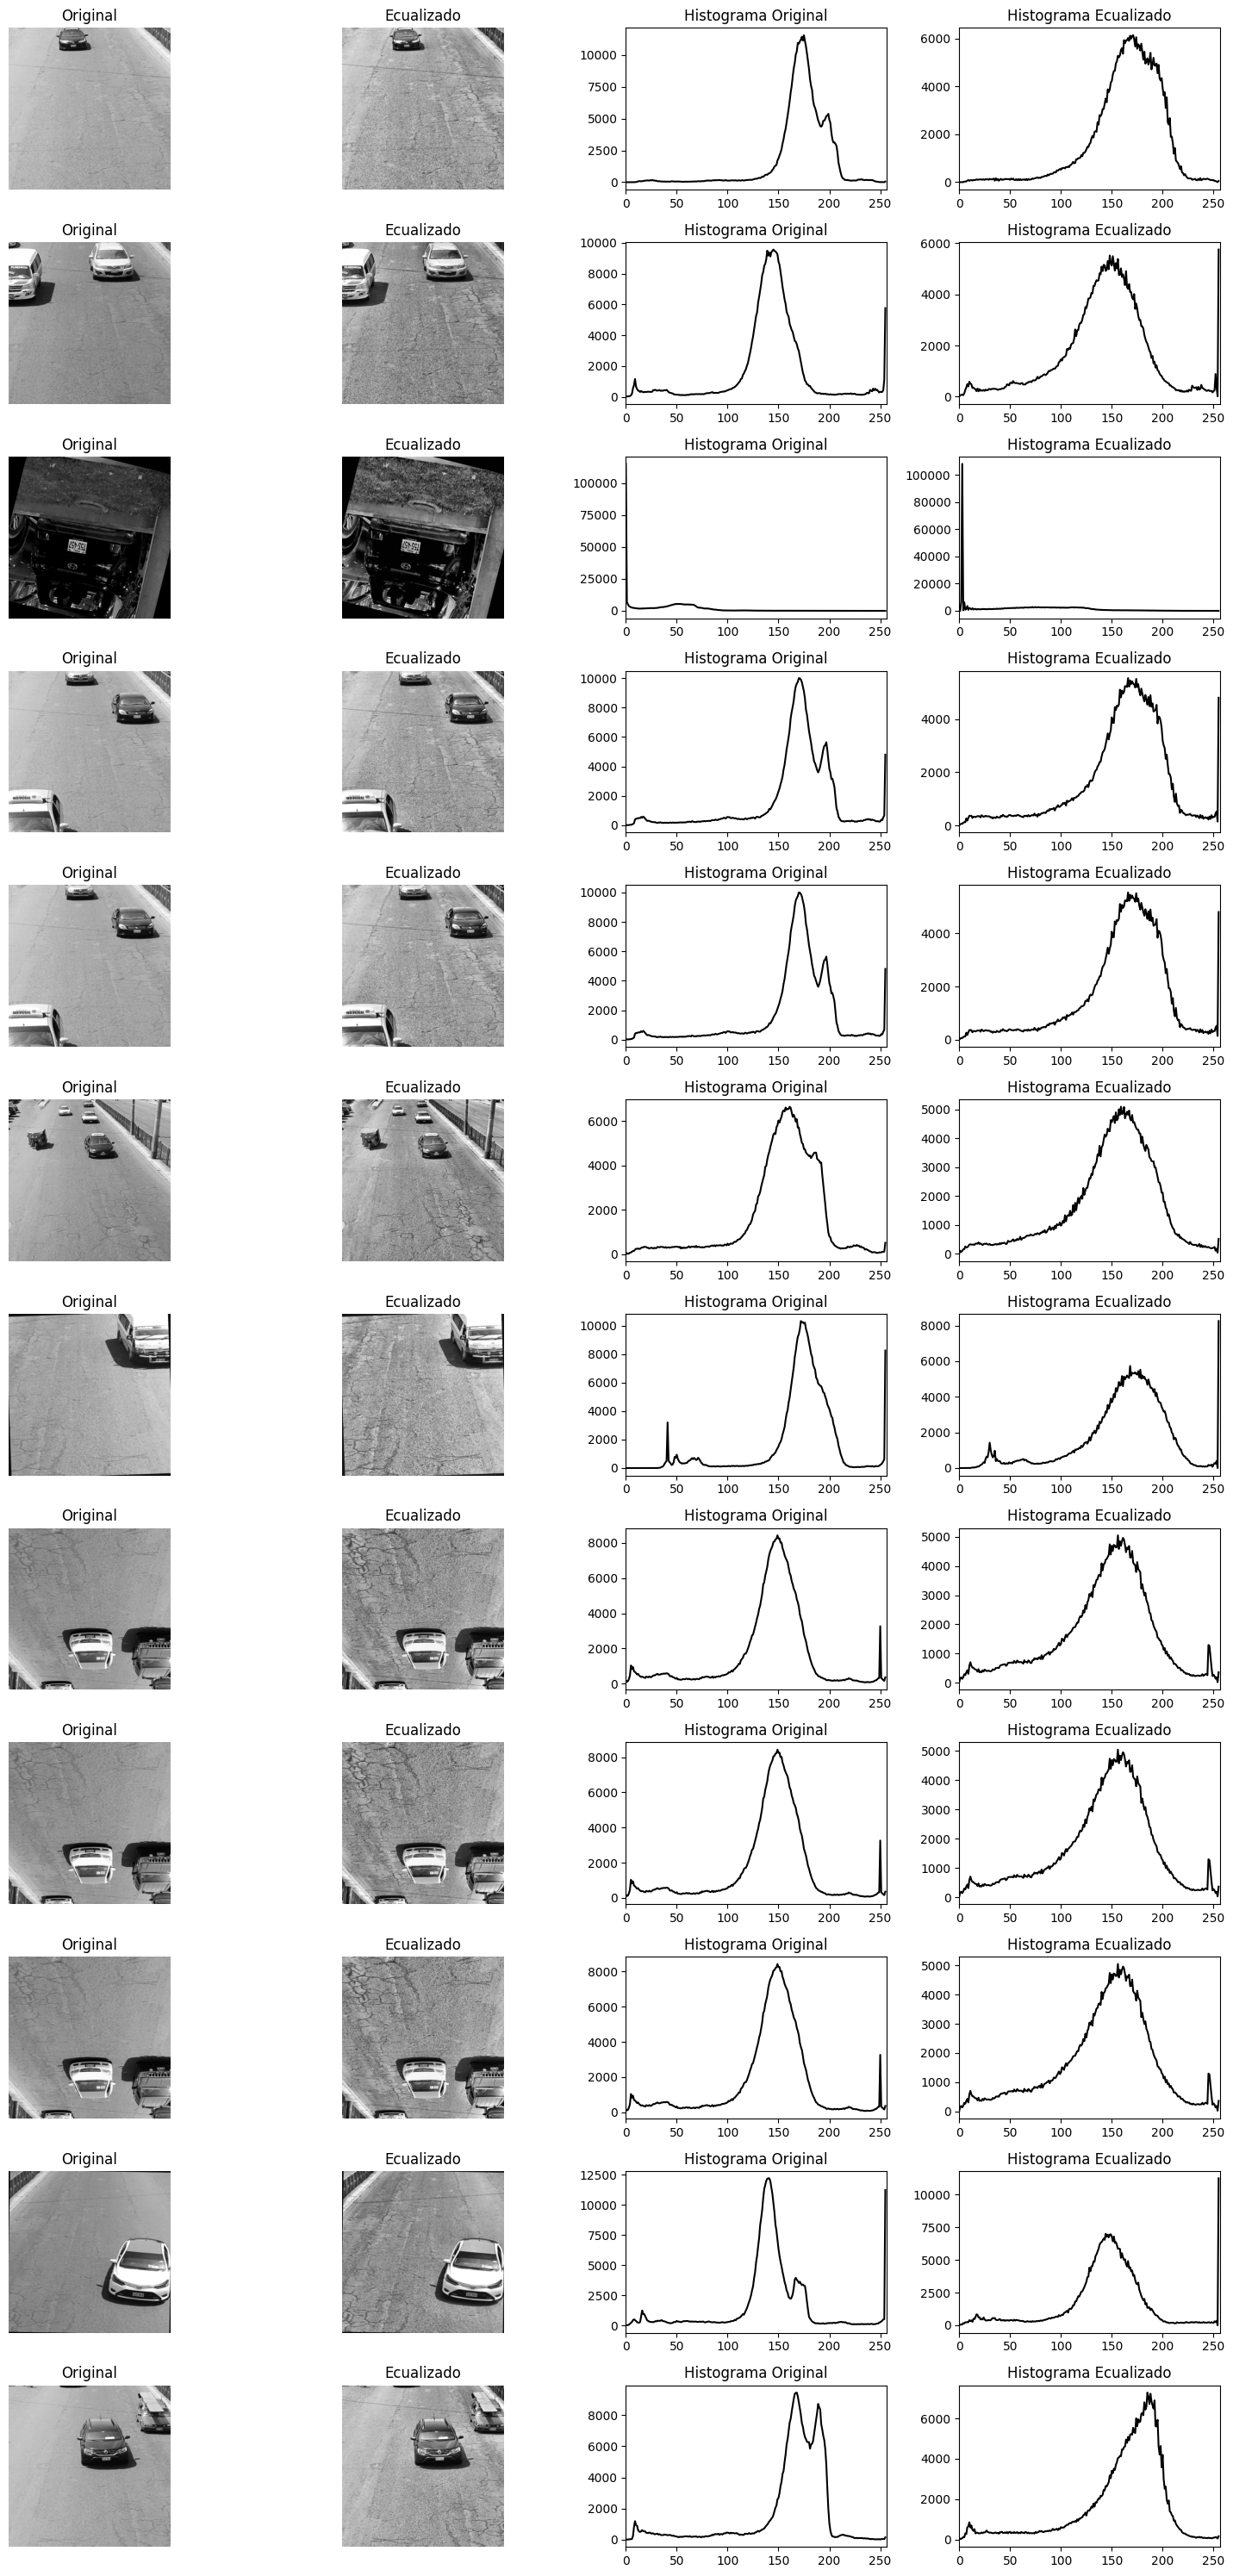

In [138]:
muestras = imagenes_bajas[:12]

plt.figure(figsize=(15, 30))

for i, (fname, _) in enumerate(muestras):
    img_path = os.path.join(img_dir, fname)
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        continue
    
    ecualizada = clahe.apply(img_gray)

    # histograma de la original
    hist_orig = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
    # histograma de la ecualizada (CLAHE)
    hist_eq = cv2.calcHist([ecualizada], [0], None, [256], [0, 256])

    # mostrar imagen original
    plt.subplot(len(muestras), 4, i*4 + 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title(f"Original")
    plt.axis("off")

    # mostrar ecualizada
    plt.subplot(len(muestras), 4, i*4 + 2)
    plt.imshow(ecualizada, cmap='gray')
    plt.title("Ecualizado")
    plt.axis("off")

    # histograma original
    plt.subplot(len(muestras), 4, i*4 + 3)
    plt.plot(hist_orig, color='black')
    plt.title("Histograma Original")
    plt.xlim([0, 256])

    # histograma ecualizada
    plt.subplot(len(muestras), 4, i*4 + 4)
    plt.plot(hist_eq, color='black')
    plt.title("Histograma Ecualizado")
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### Filtrado de datos repetidos

Primero, vamos a crear una copia del dataframe, donde vamos a colocar primero las imágenes ecualizadas, y después las imágenes convertidas a grises a la copia, de modo que las que ya fueron ecualizadas no se agreguen y este va a ser el dataframe donde trabajaremos desde ahora.

In [186]:
def construir_df_ecualizado(df, img_dir="./Dataset_TP/train", output_dir="./Dataset_TP/ecualizadas"):
    ecualizadas_files = set(os.listdir(output_dir))

    filas = []
    for _, row in df.iterrows():
        fname = row["filename"]

        if fname in ecualizadas_files:
            img_path = os.path.join(output_dir, fname)
        else:
            img_path = os.path.join(img_dir, fname)

        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img_gray is None:
            continue

        nueva_fila = row.copy()
        nueva_fila["img_gray"] = img_gray
        filas.append(nueva_fila)

    df_final = pd.DataFrame(filas).reset_index(drop=True)
    return df_final

df_ecualizado = construir_df_ecualizado(df)
print(f"Dataset combinado tiene {len(df_ecualizado)} filas con imágenes en gris guardadas.")

Dataset combinado tiene 4144 filas con imágenes en gris guardadas.


Ahora, debemos identificar si existen algunas imagenes con el mismo histograma y la misma posición de placas, de esta forma determinaremos cuantas imagenes exactamente iguales duplicadas hay (Se considera imagenes con saturación y contraste diferente como una imagen diferente, por ello comparamos también el histograma)

In [187]:
def detectar_duplicados(df):
    duplicados = []
    vistos = {}

    for _, row in df.iterrows():
        fname = row["filename"]
        img_gray = row["img_gray"]

        hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
        hist_tuple = tuple(hist.flatten().astype(int))

        bbox = (row["xmin"], row["ymin"], row["xmax"], row["ymax"])
        clave = (hist_tuple, bbox)

        if clave in vistos:
            duplicados.append((fname, vistos[clave], *bbox))
        else:
            vistos[clave] = fname

    return pd.DataFrame(duplicados, columns=["filename_duplicado", "filename_original", "xmin", "ymin", "xmax", "ymax"])

df_duplicados = detectar_duplicados(df_ecualizado)

print(f"Se encontraron {len(df_duplicados)} imágenes duplicadas.")
df_duplicados.head(10)

Se encontraron 0 imágenes duplicadas.


,filename_duplicado,filename_original,xmin,ymin,xmax,ymax


No encontramos ninguna imagen duplicada, entonces no tenemos que borrar ninguno de los datos. Aún así, la creación del dataframe copia nos servirá para los demás análisis a realizar.

### a

### b